# Загрузка Pandas и очистка данных

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

In [97]:
df = pd.read_csv('main_task.xls')
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [69]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [70]:
# delete id_ in Restaurant_id А нужно ли это делать?
df["Rest_id"]=df['Restaurant_id'].str.replace('id_','') #apply(lambda x: for x in )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
 10  Rest_id            40000 non-null  object 
dtypes: float64(3), object(8)
memory usage: 3.4+ MB


In [98]:
#City
#  создаем новый признак по городам: заменяем категорию  числом входящих в нее объектов - Count_City
df['Count_City'] = df['City'].map(df.groupby('City').size())
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Count_City
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,4897
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,820
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,5757
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,2155
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,893


In [99]:
# новый признак с населением города
dct_popl_city={"Paris":2148327,"Stockholm":975904,'London':8961989,'Berlin': 3769495,
       'Munich':1484226,'Oporto': 287591, 'Milan': 1399860,'Bratislava':432864,
        'Vienna':1888776, 'Rome': 2860009, 'Barcelona': 1620343,'Madrid':3223334 ,
          'Dublin':554554,'Brussels':1208542,'Zurich':415215,'Warsaw':1790658,
          'Budapest':1752286, 'Copenhagen':794128, 'Amsterdam':1380872,'Lyon':516092,
          'Hamburg':1899160,'Lisbon':505526,'Prague':1324277, 'Oslo':693491,'Helsinki':656229,
          'Edinburgh': 488050, 'Geneva':201818,'Ljubljana': 286745,'Athens':664046,
          'Luxembourg': 626108,'Krakow':779115}
df["Population City"]=df["City"]
df["Population City"]=df["Population City"].apply(lambda x: dct_popl_city[x])
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Count_City,Population City
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,4897,2148327
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,820,975904
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,5757,8961989
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,2155,3769495
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,893,1484226


In [100]:
#  var 1 анализ с Price Range: создаем новый признак - категории по ценам пустые значения заменяем на самое популярное часто встречающееся
df['Price Range'].unique()

df["Category Price Range"]=df["Price Range"]    # dubl
df["Category Price Range"].fillna(
    df["Category Price Range"].mode()[0], inplace=True)
df['Category Price Range'] = df['Category Price Range'].map(df.groupby('Category Price Range').size())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_id         40000 non-null  object 
 1   City                  40000 non-null  object 
 2   Cuisine Style         30717 non-null  object 
 3   Ranking               40000 non-null  float64
 4   Rating                40000 non-null  float64
 5   Price Range           26114 non-null  object 
 6   Number of Reviews     37457 non-null  float64
 7   Reviews               40000 non-null  object 
 8   URL_TA                40000 non-null  object 
 9   ID_TA                 40000 non-null  object 
 10  Count_City            40000 non-null  int64  
 11  Population City       40000 non-null  int64  
 12  Category Price Range  40000 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 4.0+ MB


In [101]:
# var 2 анализ с Price Range: создаем новый признак - категории по ценам пустые значения заменяем на самое популярное часто встречающееся
df['Price Range'].unique()

df["Category Price Range"]=df["Price Range"]    # dubl
df["Category Price Range"].fillna(
    df["Category Price Range"].mode()[0], inplace=True)

price_range_dict = {"$": 0.7, "$$ - $$$": 0.5, "$$$$": 0.01, '-': 0.1}
df["Category Price Range"] = df["Category Price Range"].apply(
    lambda x: price_range_dict[x])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_id         40000 non-null  object 
 1   City                  40000 non-null  object 
 2   Cuisine Style         30717 non-null  object 
 3   Ranking               40000 non-null  float64
 4   Rating                40000 non-null  float64
 5   Price Range           26114 non-null  object 
 6   Number of Reviews     37457 non-null  float64
 7   Reviews               40000 non-null  object 
 8   URL_TA                40000 non-null  object 
 9   ID_TA                 40000 non-null  object 
 10  Count_City            40000 non-null  int64  
 11  Population City       40000 non-null  int64  
 12  Category Price Range  40000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 4.0+ MB


In [102]:
# Cuisine Style
# добавляем новый столбец из количества кухонь
C_food=df['Cuisine Style']
C_S={} # empty
list_s=[]
C_food=C_food.fillna(1)# change nan to 1
for cuis in C_food:
    if cuis == 1:
        list_s.append(1)
    else:
        cuis=cuis.replace('[','')
        cuis=cuis.replace(']','')
        cuis=cuis.replace("'",'')
        cuis=cuis.replace(" ",'')
        cuis=cuis.split(',')
       
        long=len(cuis)
        list_s.append(long)
       
        for s in range(long):
            s_c=cuis[s]
            if s_c in C_S:
                C_S[s_c]+=1
            else:
                C_S[s_c]=1
            
print(len(C_S))            
print(sum(list_s)/40000)
m=max(C_S.values())# 
print('m=',m)
df['Count Cuisine Style']=list_s


125
2.6224
m= 11189


In [103]:
#Reviews формируем два признака
#1. выделяем интервапл отзывов 
#2. ставим оценки отзывам!

from datetime import datetime

dtl=[] # интервалы между отзывами
marks=[] # оценки
maxd=datetime.min #  minimum data

C_data=df['Reviews']
review_meaning_words = [
    "awesome",
    "excellent",
    "great",
    "unique",
    "delicious"
    "good",
    "nice"
    "ok",
    "not",
    "bad",
    "awful",
    "terrible",
    "horrible",
]
dct_review={"awesome":5,"excellent":5,"great":5,"unique":5, "delicious":5,"good":4,"nice":4, 
    "ok":3,
    "not":3,        
    "bad":2,
    "awful":2,
    "terrible":1,
    "horrible":1 }

for cd in C_data:#  перебираем все строки
   
    n=cd.rfind('[',2,-3) # индекс символа с конца  index if != -1 not equal
    n2=cd.find('/',3) # индекс символа с конца 
    if n!=-1  and n2!=-1:  # index if != -1 not equal  есть отзыв
        # with data
        dat=cd[n+1:-2] # datas
        dat=dat.replace(" ",'') # чистим
       
        dats=dat.split(',') # разделяем
        
        dt=[datetime.strptime(x,"'%m/%d/%Y'") for x in dats] # преобразуем в формат
        
        if len(dt)==1: 
            dtl.append(0)
         
        else:
            dd=abs(dt[0]-dt[1])
            dtl.append(dd.days)# выделяем интервал
            md=max(dt)
            if md>maxd:
                maxd=md
        # with marks of reviews
        rev=cd[0:n-1]  # review
        rev=rev.replace("'",' ') # чистим
        rev=rev.lower() 
        revs=rev.split(' ') # разделяем
        
        s=0
        k=0
        for words in revs: # можно сделать и изящнее! df.ecology = df.ecology.replace(to_replace=ecology_dict)
            if words in dct_review:
                s+=dct_review[words]
                k+=1
        if k==0:
            marks.append(100) # значение для не индентифицируемых оценок. затем заменим на mean
        else:
            marks.append(s/k)
                
    else:# not отзыв
        dtl.append(0)  
        marks.append(0)
print(maxd)
print(max(dtl))
df['Time Delta of Reviews']=dtl # create new value
# посмотреть выбросы!

df['Marks Reviews']=marks

# заменяем 100 на mean
popular=df["Marks Reviews"].median() # 
df.loc[df["Marks Reviews"]==100,"Marks Reviews"] = popular
df.describe()

2018-02-26 00:00:00
3207


,Ranking,Rating,Number of Reviews,Count_City,Population City,Category Price Range,Count Cuisine Style,Time Delta of Reviews,Marks Reviews
count,40000.000000,40000.000000,37457.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000
mean,3676.028525,3.993037,124.825480,2566.000000,2.788290e+06,0.513963,2.622400,102.645675,3.834903
std,3708.749567,0.668417,295.666352,1862.235407,2.688553e+06,0.120938,1.817292,198.594208,1.789255
min,1.000000,1.000000,2.000000,183.000000,2.018180e+05,0.010000,1.000000,0.000000,0.000000
25%,973.000000,3.500000,9.000000,893.000000,1.208542e+06,0.500000,1.000000,0.000000,4.000000
50%,2285.000000,4.000000,33.000000,2133.000000,1.888776e+06,0.500000,2.000000,28.000000,5.000000
75%,5260.000000,4.500000,115.000000,4897.000000,3.223334e+06,0.500000,4.000000,120.000000,5.000000
max,16444.000000,5.000000,9660.000000,5757.000000,8.961989e+06,0.700000,21.000000,3207.000000,5.000000


In [104]:
df["Time Delta of Reviews"].unique()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_id          40000 non-null  object 
 1   City                   40000 non-null  object 
 2   Cuisine Style          30717 non-null  object 
 3   Ranking                40000 non-null  float64
 4   Rating                 40000 non-null  float64
 5   Price Range            26114 non-null  object 
 6   Number of Reviews      37457 non-null  float64
 7   Reviews                40000 non-null  object 
 8   URL_TA                 40000 non-null  object 
 9   ID_TA                  40000 non-null  object 
 10  Count_City             40000 non-null  int64  
 11  Population City        40000 non-null  int64  
 12  Category Price Range   40000 non-null  float64
 13  Count Cuisine Style    40000 non-null  int64  
 14  Time Delta of Reviews  40000 non-null  int64  
 15  Ma

popular_delta 28.0


,Ranking,Rating,Number of Reviews,Count_City,Population City,Category Price Range,Count Cuisine Style,Time Delta of Reviews,Marks Reviews
count,40000.000000,40000.000000,37457.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.00000,40000.000000
mean,3676.028525,3.993037,124.825480,2566.000000,2.788290e+06,0.513963,2.622400,52.35250,3.834903
std,3708.749567,0.668417,295.666352,1862.235407,2.688553e+06,0.120938,1.817292,70.37448,1.789255
min,1.000000,1.000000,2.000000,183.000000,2.018180e+05,0.010000,1.000000,0.00000,0.000000
25%,973.000000,3.500000,9.000000,893.000000,1.208542e+06,0.500000,1.000000,0.00000,4.000000
50%,2285.000000,4.000000,33.000000,2133.000000,1.888776e+06,0.500000,2.000000,28.00000,5.000000
75%,5260.000000,4.500000,115.000000,4897.000000,3.223334e+06,0.500000,4.000000,76.00000,5.000000
max,16444.000000,5.000000,9660.000000,5757.000000,8.961989e+06,0.700000,21.000000,300.00000,5.000000


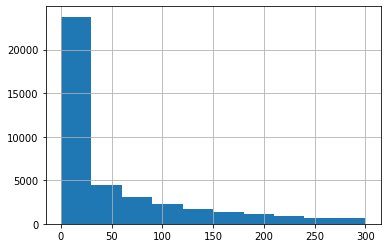

In [105]:
# выбросы ищем в Time Delta of Reviews
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return  upper_bound, lower_bound   #np.where((ys > upper_bound) | (ys < lower_bound))[0]
up,lo=outliers_iqr(df['Time Delta of Reviews'])
popular_delta=df["Time Delta of Reviews"].median()
print('popular_delta',popular_delta)
df.loc[df["Time Delta of Reviews"]>up,"Time Delta of Reviews"] = popular_delta
          
max_delta = np.max(df['Time Delta of Reviews']) # max Delta
max_delta
# сколько раз встречается max delta
max_delta_count = np.sum(df['Time Delta of Reviews'] == max_delta)
max_delta_count, max_delta_count/df.shape[0]
df['Time Delta of Reviews'][df['Time Delta of Reviews'] < 2000].hist();
df.describe()


In [106]:
#Удаляем все столбцы с типом object 
df=df.drop(['City', 'Cuisine Style','Price Range','Reviews','URL_TA','ID_TA' ], axis=1)

In [107]:
# смотрим пропуски данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_id          40000 non-null  object 
 1   Ranking                40000 non-null  float64
 2   Rating                 40000 non-null  float64
 3   Number of Reviews      37457 non-null  float64
 4   Count_City             40000 non-null  int64  
 5   Population City        40000 non-null  int64  
 6   Category Price Range   40000 non-null  float64
 7   Count Cuisine Style    40000 non-null  int64  
 8   Time Delta of Reviews  40000 non-null  float64
 9   Marks Reviews          40000 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.1+ MB


In [108]:
#  NaN delete in 'Number of Reviews' used mean
df=df.fillna(df.mean())
#df=df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_id          40000 non-null  object 
 1   Ranking                40000 non-null  float64
 2   Rating                 40000 non-null  float64
 3   Number of Reviews      40000 non-null  float64
 4   Count_City             40000 non-null  int64  
 5   Population City        40000 non-null  int64  
 6   Category Price Range   40000 non-null  float64
 7   Count Cuisine Style    40000 non-null  int64  
 8   Time Delta of Reviews  40000 non-null  float64
 9   Marks Reviews          40000 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.1+ MB


In [109]:
# стандартизация всех данных за исклчением Restaurant_id
from sklearn.preprocessing import MinMaxScaler

df2=df # копируем данные
R_ID=df['Restaurant_id'] # сохранили данные

df2=df2.drop(['Restaurant_id'], axis=1)
col=df2.columns
scaler = MinMaxScaler()
data=scaler.fit_transform(df2) # стандартизовали данные
df = pd.DataFrame(data,columns=col)
df['Restaurant_id']=R_ID
df.head()

,Ranking,Rating,Number of Reviews,Count_City,Population City,Category Price Range,Count Cuisine Style,Time Delta of Reviews,Marks Reviews,Restaurant_id
0,0.338685,0.625,0.019880,0.845712,0.222200,0.710145,0.1,0.136667,0.8,id_5569
1,0.093414,0.750,0.000828,0.114281,0.088364,0.710145,0.0,0.093333,1.0,id_1535
2,0.021407,0.875,0.071029,1.000000,1.000000,0.000000,0.3,0.006667,0.6,id_352
3,0.210241,1.000,0.000104,0.353785,0.407261,0.710145,0.0,0.000000,0.0,id_3456
4,0.037706,0.750,0.008490,0.127377,0.146391,0.710145,0.1,0.906667,0.8,id_615


In [110]:
df.head()

,Ranking,Rating,Number of Reviews,Count_City,Population City,Category Price Range,Count Cuisine Style,Time Delta of Reviews,Marks Reviews,Restaurant_id
0,0.338685,0.625,0.019880,0.845712,0.222200,0.710145,0.1,0.136667,0.8,id_5569
1,0.093414,0.750,0.000828,0.114281,0.088364,0.710145,0.0,0.093333,1.0,id_1535
2,0.021407,0.875,0.071029,1.000000,1.000000,0.000000,0.3,0.006667,0.6,id_352
3,0.210241,1.000,0.000104,0.353785,0.407261,0.710145,0.0,0.000000,0.0,id_3456
4,0.037706,0.750,0.008490,0.127377,0.146391,0.710145,0.1,0.906667,0.8,id_615


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [111]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df['Rating']

In [112]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [113]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [114]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [115]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [116]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.0529375
